About Dataset
The below column reference:

    step: represents a unit of time where 1 step equals 1 hour
    type: type of online transaction
    amount: the amount of the transaction
    nameOrig: customer starting the transaction
    oldbalanceOrg: balance before the transaction
    newbalanceOrig: balance after the transaction
    nameDest: recipient of the transaction
    oldbalanceDest: initial balance of recipient before the transaction
    newbalanceDest: the new balance of recipient after the transaction
    isFraud: fraud transaction

In [1]:
 from google.colab import drive 
 drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd ./drive/MyDrive/DataMining

/content/drive/MyDrive/DataMining


In [ ]:
!unzip "OnlinePaymentDataset.zip"

Archive:  OnlinePaymentDataset.zip
  inflating: OnlinePaymentDataset.csv  


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('OnlinePaymentDataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# all columns 
print(list(df.columns))

# shape of data
print(f'The dataset has shape {df.shape}')

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
The dataset has shape (6362620, 11)


In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#some statistic from dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#check the missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The data has no missing values / null values

In [ ]:
df.duplicated().sum()

0

# Data Analyse

In [ ]:
#Frequency of step where 1 step equals 1 hour
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

<AxesSubplot: xlabel='step', ylabel='Count'>

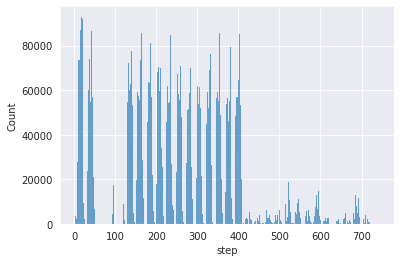

In [ ]:
import seaborn as sns
sns.histplot(data=df,x='step')

there are 743 steps and all steps has occurences more than 1.

In [ ]:
# exploring transaction type
print(df['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


In [ ]:
#pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 5.3 MB/s 
     |████████████████████████████████| 965 kB 60.4 MB/s 
     |████████████████████████████████| 295 kB 38.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


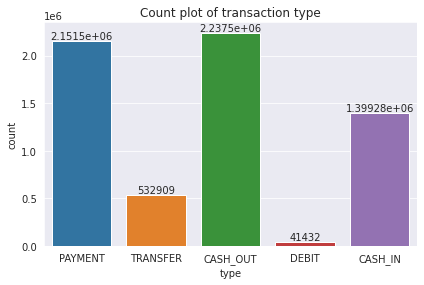

In [ ]:
#Frequency of online transaction type in barchart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure()
ax = sns.countplot(x='type', data=df)
for container in ax.containers:
  ax.bar_label(container)
plt.tight_layout()
plt.title('Count plot of transaction type')
plt.show(fig)

The most transaction type is CASH_OUT with slight difference than PAYMENT

In [ ]:
# distribution of transaction type in piechart

type = df.type.value_counts()
transaction = type.index
quantity = type.values

# draw pie circule with plotly
import plotly.express as px
figure = px.pie(df,
               values = quantity,
               names = transaction,
               hole = .5,
               title = 'Distribution of Transaction Type')
figure.show()


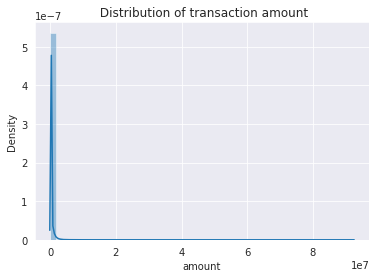

In [ ]:
#Distribution of transaction amount
fig = plt.figure()
sns.distplot(df['amount'])
plt.title(' Distribution of transaction amount')
plt.show(fig)

The distribution of amount is left skewed

In [ ]:
#Frequency of customer name starting the transaction
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

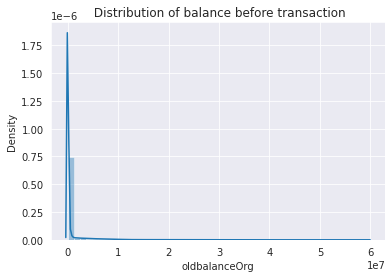

In [ ]:
#Distribution of balance before the transaction /oldbalanceOrg
fig = plt.figure()
sns.distplot(df['oldbalanceOrg'])
plt.title(' Distribution of balance before transaction')
plt.show(fig)

The distribution of oldbalanceOrg left skewed

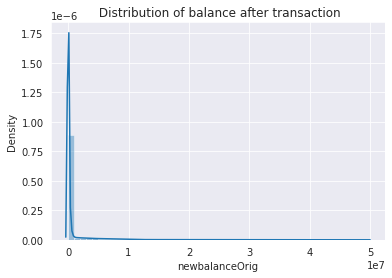

In [ ]:
#Distribution of balance after the transaction
fig = plt.figure()
sns.distplot(df['newbalanceOrig'])
plt.title(' Distribution of balance after transaction')
plt.show(fig)

The distribution of newbalanceOrig is left skewed

In [ ]:
#Frequency of transaction recipient
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

There are more than 2 million recipients. Some recipients appear more than once and some recipients appear only once

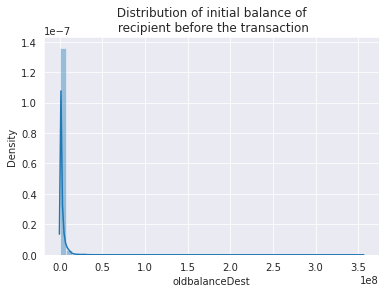

In [ ]:
#Distribution of initial balance of recipient before the transaction /oldbalanceDest
fig = plt.figure()
sns.distplot(df['oldbalanceDest'])
plt.title(' Distribution of initial balance of \n recipient before the transaction')
plt.show(fig)

The distribution of oldbalanceDest is left skewed

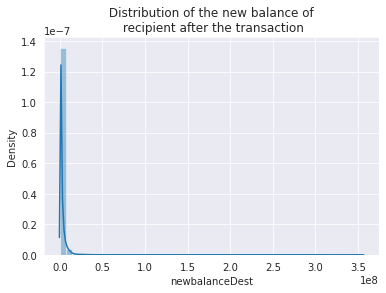

In [ ]:
#Distribution of the new balance of recipient after the transaction
fig = plt.figure()
sns.distplot(df['newbalanceDest'])
plt.title(' Distribution of the new balance of \n recipient after the transaction')
plt.show(fig)

The distribution of newbalanceDest is left skewed

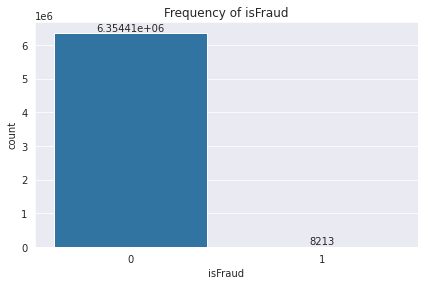

In [ ]:
#Frequency of isFraud variable
fig = plt.figure()
ax = sns.countplot(x='isFraud', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.title('Frequency of isFraud')
plt.show(fig)

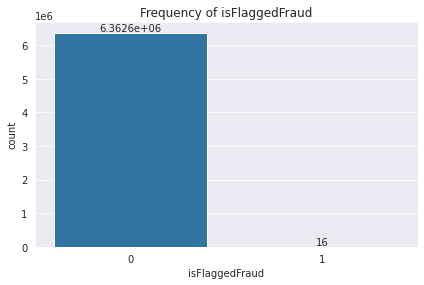

In [ ]:
#Frequency of isFlaggedFraud variable
fig = plt.figure()
ax = sns.countplot(x='isFlaggedFraud', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.title('Frequency of isFlaggedFraud')
plt.show(fig)

There is a huge difference between "0" and "1" data which means there is imbalance in the dataset

since there is no explanation about isFlaggedFraud and low number of isflaggedFraud 1's.

<AxesSubplot: >

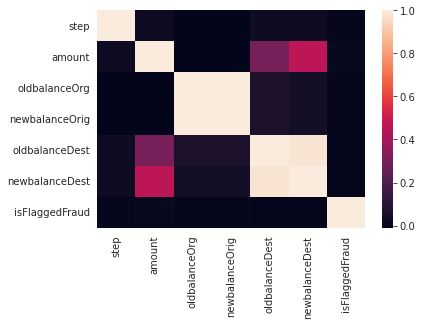

In [ ]:
#Correlation between variables
sns.heatmap(df.loc[:, df.columns != 'isFraud'].corr())

oldbalanceOrg and newbalanceOrg has high correlation,
oldbalanceDest and newbalanceDest has high correlation

<AxesSubplot: xlabel='type', ylabel='count'>

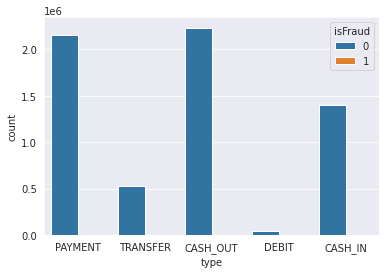

In [ ]:
#Frequency of transaction type and isFraud
sns.countplot(x='type', data=df, hue='isFraud')

All type of transaction dominated by "0"

In [ ]:
# show Correlation
correlation = df.corr()
print(correlation['isFraud'].sort_values(ascending = False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


# data preprocessing

there is no idea about the isflagged column and there is small amount(16) of 1s in the set so need to drop the column

In [ ]:
newData=df

In [ ]:
newData.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#drop the isflaggedFraud column
processingData=newData.drop('isFlaggedFraud', axis='columns', inplace=False)
processingData.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
#as type is a categorical need to transform the categorical features into numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processingData['type'] = labelencoder.fit_transform(newData['type'])
print(processingData['type'])

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64


In [ ]:
#name of destination and name of origin not going to effet the set.
#from that we can drop those columns too.
cleanedData=processingData
cleanedData.drop('nameOrig', axis='columns', inplace=True)
cleanedData.drop('nameDest', axis='columns', inplace=True)

In [ ]:
cleanedData.drop('step', axis='columns', inplace=True)

In [ ]:
cleanedData.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
y=cleanedData['isFraud']
X=cleanedData.drop('isFraud',axis='columns',inplace=False)

In [ ]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [ ]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.00,160296.36,0.00,0.00
1,3,1864.28,21249.00,19384.72,0.00,0.00
2,4,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,4,850002.52,850002.52,0.00,0.00,0.00


In [ ]:
print("shape of the x : ",X.shape)
print("shape of the y : ",y.shape)

shape of the x :  (6362620, 6)
shape of the y :  (6362620,)


# **Under Sampling the data set to balance the data set**

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
# define undersample strategy
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
#shape after the balanced
print("shape of the X : ",X_under.shape)
print("shape of the y : ",y_under.shape)

shape of the X :  (16426, 6)
shape of the y :  (16426,)


In [ ]:
y_under

0        0
1        0
2        0
3        0
4        0
        ..
16421    1
16422    1
16423    1
16424    1
16425    1
Name: isFraud, Length: 16426, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = SVC(kernel='rbf')

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier()

In [ ]:
models

{'Logistic Regression': LogisticRegression(),
 'Support Vector Machines': SVC(),
 'Decision Trees': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Naive Bayes': GaussianNB(),
 'K-Nearest Neighbor': KNeighborsClassifier(),
 'Gradient Boosting': GradientBoostingClassifier()}

In [ ]:
#save each predicted value and perfomance measure in each specified indexes
y_pred = {}
accuracy, precision, recall, f1score = {}, {}, {}, {}
accuracy_err, precision_err, recall_err, f1score_err = {}, {}, {}, {}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay

# prepare the features and target
standardizer = StandardScaler()
x_label = standardizer.fit_transform(X_under)
y_label = np.ravel(y_under)

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds)

In [ ]:
print("--------------5-Fold Validation---------------\n")
for key in models.keys():
    test_accuracy = np.zeros((n_folds))
    test_precision = np.zeros((n_folds))
    test_recall = np.zeros((n_folds))
    test_f1 = np.zeros((n_folds))

    for i, (train_index, test_index) in enumerate(skf.split(x_label, y_label)):
        models[key].fit(x_label[train_index], y_label[train_index])
        y_pred[key] = models[key].predict(x_label[test_index])
        
        
        # performance metrics
        test_accuracy[i] = accuracy_score(y_label[test_index], y_pred[key])
        test_precision[i] = precision_score(y_label[test_index], y_pred[key])
        test_recall[i] = recall_score(y_label[test_index], y_pred[key])
        test_f1[i] = f1_score(y_label[test_index], y_pred[key])
    
    print("\n----"+key+"----")
    print("Accuracies : ",test_accuracy)
    accuracy[key] = test_accuracy.mean()
    accuracy_err[key] = test_accuracy.std()
    
    print("precisions : ",test_precision)
    precision[key] = test_precision.mean()
    precision_err[key] = test_precision.std()
    
    print("recalls : ",test_recall)
    recall[key] = test_recall.mean()
    recall_err[key] = test_recall.std()
    
    print("f1-scores : ",test_f1)
    f1score[key] = test_f1.mean()
    f1score_err[key] = test_f1.std()

--------------5-Fold Validation---------------


----Logistic Regression----
Accuracies :  [0.85088253 0.8782344  0.88493151 0.88066971 0.87092846]
precisions :  [0.98404702 0.97990726 0.98097412 0.97638995 0.97803922]
recalls :  [0.71332928 0.77222899 0.78501827 0.78027998 0.75897748]
f1-scores :  [0.82709951 0.86376022 0.87212449 0.86738836 0.854695  ]

----Support Vector Machines----
Accuracies :  [0.88527085 0.89863014 0.90715373 0.90319635 0.89741248]
precisions :  [0.98100304 0.97669337 0.9812815  0.97153025 0.97733918]
recalls :  [0.78575776 0.81668697 0.83008526 0.83079732 0.81375533]
f1-scores :  [0.87259209 0.88955224 0.89937314 0.89566929 0.88807705]

----Decision Trees----
Accuracies :  [0.98600122 0.99025875 0.99208524 0.99391172 0.99482496]
precisions :  [0.99381571 0.99025579 0.98792271 0.99033233 0.99034982]
recalls :  [0.97808886 0.99025579 0.99634592 0.99756543 0.99939136]
f1-scores :  [0.98588957 0.99025579 0.99211643 0.99393572 0.99485005]

----Random Forest----
Acc

In [ ]:
accuracy['Support Vector Machines']

0.8983327080154634

In [ ]:
accuracy['Logistic Regression']

0.8731293222202767

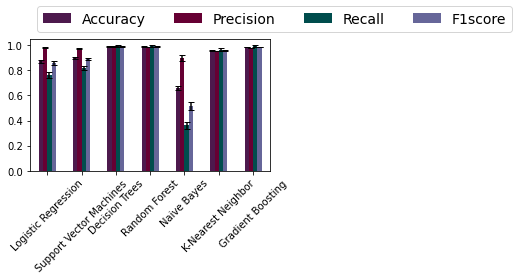

In [ ]:
import matplotlib.pyplot as plt
df_model = pd.DataFrame(index=models.keys(), 
                        columns=['Accuracy', 'Precision', 'Recall', 'F1score'])

df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1score'] = f1score.values()

df_model_err = pd.DataFrame(index=models.keys(), 
                            columns=['Accuracy', 'Precision', 'Recall', 'F1score'])

df_model_err['Accuracy'] = accuracy_err.values()
df_model_err['Precision'] = precision_err.values()
df_model_err['Recall'] = recall_err.values()
df_model_err['F1score'] = f1score_err.values()

ax  = df_model.plot.bar(rot=45,color=['#4d194d', '#660033', '#004d4d', '#666699'],
                        yerr=df_model_err,capsize=3)

ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), 
          loc='lower left', prop={'size': 14})

plt.tight_layout()

In [ ]:
df_model

,Accuracy,Precision,Recall,F1score
Logistic Regression,0.873129,0.979872,0.761967,0.857014
Support Vector Machines,0.898333,0.977569,0.815417,0.889053
Decision Trees,0.991538,0.990305,0.992817,0.991536
Random Forest,0.990929,0.987449,0.994522,0.990945
Naive Bayes,0.660478,0.897375,0.362351,0.515643
K-Nearest Neighbor,0.960186,0.955322,0.965544,0.960370
Gradient Boosting,0.987155,0.979177,0.995495,0.987253


In [ ]:
df_model_err

,Accuracy,Precision,Recall,F1score
Logistic Regression,0.012016,0.002613,0.025871,0.016011
Support Vector Machines,0.007389,0.003546,0.016345,0.009192
Decision Trees,0.003141,0.002830,0.007645,0.003181
Random Forest,0.003529,0.002662,0.008573,0.003584
Naive Bayes,0.015799,0.023107,0.029379,0.031610
K-Nearest Neighbor,0.005151,0.003045,0.010867,0.005367
Gradient Boosting,0.002137,0.002171,0.006032,0.002177


# Save the trained model and load later to use

In [ ]:
import pickle

# save the model to disk
filename = 'models.sav'
pickle.dump(models, open(filename, 'wb'))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_label,y_label,test_size=0.2,random_state=0)

In [ ]:
#shape
print("shape of the X_train : ",X_train.shape)
print("shape of the y_train : ",y_train.shape)
print("shape of the X_test : ",X_test.shape)
print("shape of the y_test : ",y_test.shape)

shape of the X_train :  (13140, 6)
shape of the y_train :  (13140,)
shape of the X_test :  (3286, 6)
shape of the y_test :  (3286,)


In [ ]:
# load the model from disk
import pickle
filename = 'models.sav'
loaded_model = pickle.load(open(filename, 'rb'))
LR = loaded_model['Decision Trees']

In [ ]:
result=LR.score(X_test, y_test)
print(result)

0.9990870359099209
